In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e1/sample_submission.csv
/kaggle/input/playground-series-s3e1/train.csv
/kaggle/input/playground-series-s3e1/test.csv


Feature Engineering When It Comes to Locational Information


https://bmanikan.medium.com/feature-engineering-all-i-learned-about-geo-spatial-features-649871d16796


In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s3e1/train.csv')
train

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500
...,...,...,...,...,...,...,...,...,...,...
37132,37132,3.3438,50.0,4.936508,1.079365,1775.0,3.022222,34.19,-118.36,1.856
37133,37133,3.7308,26.0,5.087533,0.966019,1006.0,4.316901,37.32,-121.86,1.588
37134,37134,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44,3.387
37135,37135,2.7143,16.0,5.710074,1.068376,584.0,2.803659,38.40,-120.98,1.592


In [3]:
test = pd.read_csv('/kaggle/input/playground-series-s3e1/test.csv')
test

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,37137,1.7062,35.0,4.966368,1.096539,1318.0,2.844411,39.75,-121.85
1,37138,1.3882,22.0,4.187035,1.098229,2296.0,3.180218,33.95,-118.29
2,37139,7.7197,21.0,7.129436,0.959276,1535.0,2.888889,33.61,-117.81
3,37140,4.6806,49.0,4.769697,1.048485,707.0,1.743590,34.17,-118.34
4,37141,3.1284,25.0,3.765306,1.081633,4716.0,2.003827,34.17,-118.29
...,...,...,...,...,...,...,...,...,...
24754,61891,2.2875,34.0,3.914729,1.085271,866.0,2.071429,34.44,-119.75
24755,61892,3.0781,33.0,4.771971,1.038674,1628.0,2.326848,34.09,-117.96
24756,61893,2.6961,14.0,4.593960,1.170380,3900.0,2.540034,37.51,-120.83
24757,61894,7.2315,8.0,7.508403,1.018692,1388.0,2.601202,33.67,-117.98


In [4]:
train[train['MedHouseVal']>=5]

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
18,18,12.4118,18.0,8.863081,1.112082,1288.0,3.050392,34.04,-118.90,5.00001
83,83,9.4894,38.0,7.434426,1.032787,654.0,2.893443,34.07,-118.34,5.00001
108,108,4.0911,39.0,5.324324,1.110811,1501.0,2.053245,33.62,-117.87,5.00001
109,109,15.0001,17.0,8.642586,1.027739,1674.0,3.311518,34.15,-118.83,5.00001
120,120,5.2337,31.0,4.964286,1.088537,871.0,2.189024,34.07,-118.40,5.00001
...,...,...,...,...,...,...,...,...,...,...
37038,37038,6.3749,22.0,4.834667,0.984000,1179.0,2.996000,33.86,-118.40,5.00001
37060,37060,8.0753,36.0,7.411111,1.068627,1705.0,2.936255,33.99,-118.43,5.00001
37061,37061,7.1615,45.0,7.098361,1.018305,823.0,2.504673,37.58,-122.34,5.00001
37066,37066,10.2311,52.0,8.592308,1.461538,191.0,1.692308,37.79,-122.39,5.00001


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  """


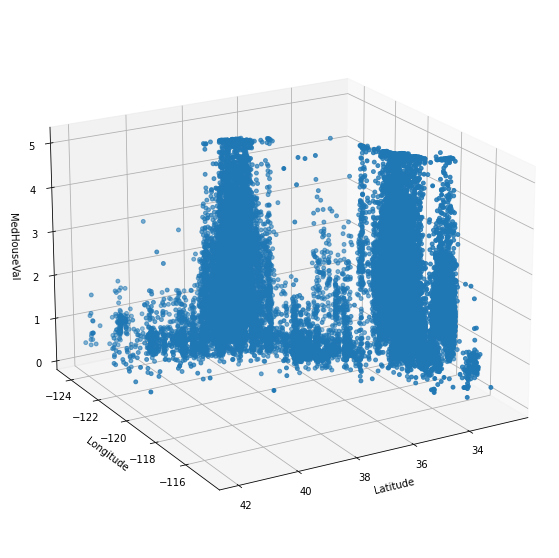

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,10))
ax = fig.gca(projection='3d')
ax.view_init(20,60)
x = train['Latitude']
y = train['Longitude']
z = train['MedHouseVal']
ax.scatter(x,y,z, marker='o', s= 15)
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('MedHouseVal')
plt.show()


## Outliers 제거 -> 성능하락

In [6]:
# drop_index = train[(train['Population']>=8000) | (train['MedInc']>=13)].index
# train = train.drop(drop_index)
# train

## Target 분포 확인

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MedHouseVal', ylabel='Density'>

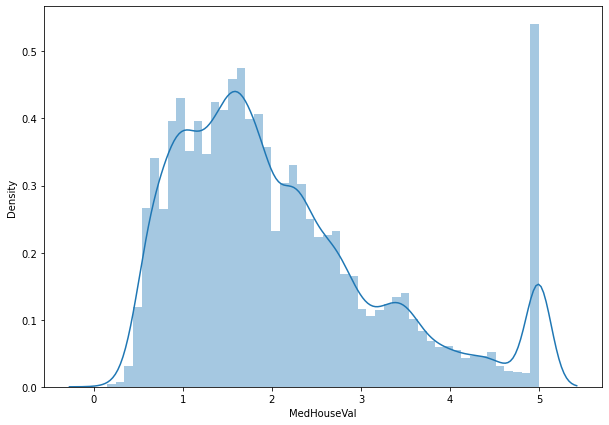

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.distplot(train['MedHouseVal'])

In [8]:
alldata = pd.concat([train,test])
alldata

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500
...,...,...,...,...,...,...,...,...,...,...
24754,61891,2.2875,34.0,3.914729,1.085271,866.0,2.071429,34.44,-119.75,NaN
24755,61892,3.0781,33.0,4.771971,1.038674,1628.0,2.326848,34.09,-117.96,NaN
24756,61893,2.6961,14.0,4.593960,1.170380,3900.0,2.540034,37.51,-120.83,NaN
24757,61894,7.2315,8.0,7.508403,1.018692,1388.0,2.601202,33.67,-117.98,NaN


In [9]:
alldata2 = alldata.drop(columns = ['id', 'MedHouseVal'])


# Latitude + Longitude 피쳐컬럼 추가(Lat_Long) -> 성능 향상

In [10]:
alldata2['Lat_Long'] = alldata2['Latitude'].astype(str) + '_' + alldata2['Longitude'].astype(str)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
alldata2['Lat_Long'] = le.fit_transform(alldata2['Lat_Long'])
alldata2

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Lat_Long
0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,8521
1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,16617
2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,8541
3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,117
4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,13916
...,...,...,...,...,...,...,...,...,...
24754,2.2875,34.0,3.914729,1.085271,866.0,2.071429,34.44,-119.75,8120
24755,3.0781,33.0,4.771971,1.038674,1628.0,2.326848,34.09,-117.96,5826
24756,2.6961,14.0,4.593960,1.170380,3900.0,2.540034,37.51,-120.83,12133
24757,7.2315,8.0,7.508403,1.018692,1388.0,2.601202,33.67,-117.98,2039


> Houseage(갯수적음)에 따른 MedInc(feature importance높음) aggregation 컬럼추가 -> 성능 향상

In [11]:
houseage_medinc = alldata2.groupby('HouseAge')['MedInc'].agg(['mean','median','max','min','std','sum','count'])
alldata2 = pd.merge(alldata2,houseage_medinc,on = 'HouseAge', how = 'left')
alldata2

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Lat_Long,mean,median,max,min,std,sum,count
0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,8521,3.942843,3.65630,14.9009,0.8198,1.619890,7830.486900,1986
1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,16617,3.712392,3.41390,15.0001,0.7445,1.615881,10179.378920,2742
2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,8541,3.730500,3.40050,15.0001,0.7069,1.689737,5606.941800,1503
3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,117,4.077738,3.76585,15.0001,0.4999,1.713454,9484.819150,2326
4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,13916,3.894245,3.45195,15.0001,0.4999,2.164396,13310.529993,3418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61891,2.2875,34.0,3.914729,1.085271,866.0,2.071429,34.44,-119.75,8120,4.019930,3.66250,15.0001,0.4999,1.981620,6363.549200,1583
61892,3.0781,33.0,4.771971,1.038674,1628.0,2.326848,34.09,-117.96,5826,3.886443,3.60030,15.0001,0.9204,1.723863,5207.833000,1340
61893,2.6961,14.0,4.593960,1.170380,3900.0,2.540034,37.51,-120.83,12133,4.009868,3.75850,15.0001,0.8585,1.632325,6556.134000,1635
61894,7.2315,8.0,7.508403,1.018692,1388.0,2.601202,33.67,-117.98,2039,4.129699,3.78410,10.9237,0.9710,1.650522,2523.245920,611


In [12]:
from sklearn.decomposition import PCA

def pca_crds(alldata2):
    coordinates = alldata2[['Latitude', 'Longitude']].values
    pca_obj = PCA().fit(coordinates)
    alldata2['pca_lat'] = pca_obj.transform(alldata2[['Latitude', 'Longitude']])[:,0]
    alldata2['pca_lon'] = pca_obj.transform(alldata2[['Latitude', 'Longitude']])[:,1]
    return alldata2

alldata2 = pca_crds(alldata2)
alldata2


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Lat_Long,mean,median,max,min,std,sum,count,pca_lat,pca_lon
0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,8521,3.942843,3.65630,14.9009,0.8198,1.619890,7830.486900,1986,-0.330725,-1.079932
1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,16617,3.712392,3.41390,15.0001,0.7445,1.615881,10179.378920,2742,3.400657,0.923786
2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,8541,3.730500,3.40050,15.0001,0.7069,1.689737,5606.941800,1503,-0.024382,-1.244717
3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,117,4.077738,3.76585,15.0001,0.4999,1.713454,9484.819150,2326,-3.820463,-0.204587
4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,13916,3.894245,3.45195,15.0001,0.4999,2.164396,13310.529993,3418,3.568775,-0.552674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61891,2.2875,34.0,3.914729,1.085271,866.0,2.071429,34.44,-119.75,8120,4.019930,3.66250,15.0001,0.4999,1.981620,6363.549200,1583,-0.700891,-0.920315
61892,3.0781,33.0,4.771971,1.038674,1628.0,2.326848,34.09,-117.96,5826,3.886443,3.60030,15.0001,0.9204,1.723863,5207.833000,1340,-2.183018,0.142652
61893,2.6961,14.0,4.593960,1.170380,3900.0,2.540034,37.51,-120.83,12133,4.009868,3.75850,15.0001,0.8585,1.632325,6556.134000,1635,2.274313,0.398572
61894,7.2315,8.0,7.508403,1.018692,1388.0,2.601202,33.67,-117.98,2039,4.129699,3.78410,10.9237,0.9710,1.650522,2523.245920,611,-2.475026,-0.159891


## 위도/경도 회전변환(rotation) feature 추가

In [13]:
def crt_crds(alldata2): 
    alldata2['rot_15_x'] = (np.cos(np.radians(15)) * alldata2['Longitude']) + \
                      (np.sin(np.radians(15)) * alldata2['Latitude'])
    
    alldata2['rot_15_y'] = (np.cos(np.radians(15)) * alldata2['Latitude']) + \
                      (np.sin(np.radians(15)) * alldata2['Longitude'])
    
    alldata2['rot_30_x'] = (np.cos(np.radians(30)) * alldata2['Longitude']) + \
                      (np.sin(np.radians(30)) * alldata2['Latitude'])
    
    alldata2['rot_30_y'] = (np.cos(np.radians(30)) * alldata2['Latitude']) + \
                      (np.sin(np.radians(30)) * alldata2['Longitude'])
    
    alldata2['rot_45_x'] = (np.cos(np.radians(45)) * alldata2['Longitude']) + \
                      (np.sin(np.radians(45)) * alldata2['Latitude'])
    return alldata2

alldata2 = crt_crds(alldata2)

In [14]:
train['Longitude'].value_counts()

-118.30    398
-118.29    369
-118.37    324
-118.16    300
-118.25    291
          ... 
-123.37      1
-116.14      1
-116.30      1
-123.39      1
-120.39      1
Name: Longitude, Length: 755, dtype: int64

In [15]:
train2 = alldata2[:len(train)]
test2 = alldata2[len(train):]
test2

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Lat_Long,mean,...,std,sum,count,pca_lat,pca_lon,rot_15_x,rot_15_y,rot_30_x,rot_30_y,rot_45_x
37137,1.7062,35.0,4.966368,1.096539,1318.0,2.844411,39.75,-121.85,17772,3.920618,...,1.761195,7668.72798,1956,4.604214,1.192022,-107.410005,6.858451,-85.650195,-26.500490,-58.053467
37138,1.3882,22.0,4.187035,1.098229,2296.0,3.180218,33.95,-118.29,4305,3.919745,...,1.836180,7455.35518,1902,-2.058652,-0.193552,-105.472459,2.177477,-85.467145,-29.743438,-59.637386
37139,7.7197,21.0,7.129436,0.959276,1535.0,2.888889,33.61,-117.81,1759,3.759490,...,1.775411,8549.07974,2274,-2.635265,-0.077287,-105.096813,1.973295,-85.221453,-29.797886,-59.538391
37140,4.6806,49.0,4.769697,1.048485,707.0,1.743590,34.17,-118.34,6791,3.316054,...,1.493228,838.96160,253,-1.864229,-0.079099,-105.463816,2.377040,-85.400446,-29.577912,-59.517178
37141,3.1284,25.0,3.765306,1.081633,4716.0,2.003827,34.17,-118.29,6786,4.068655,...,1.765280,11021.98728,2709,-1.898513,-0.042704,-105.415519,2.389981,-85.357145,-29.552912,-59.481822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61891,2.2875,34.0,3.914729,1.085271,866.0,2.071429,34.44,-119.75,8120,4.019930,...,1.981620,6363.54920,1583,-0.700891,-0.920315,-106.755890,2.272905,-86.486542,-30.049085,-60.323280
61892,3.0781,33.0,4.771971,1.038674,1628.0,2.326848,34.09,-117.96,5826,3.886443,...,1.723863,5207.83300,1340,-2.183018,0.142652,-105.117469,2.398117,-85.111357,-29.457194,-59.305046
61893,2.6961,14.0,4.593960,1.170380,3900.0,2.540034,37.51,-120.83,12133,4.009868,...,1.632325,6556.13400,1635,2.274313,0.398572,-107.004515,4.958773,-85.886850,-27.930387,-58.916137
61894,7.2315,8.0,7.508403,1.018692,1388.0,2.601202,33.67,-117.98,2039,4.129699,...,1.650522,2523.24592,611,-2.475026,-0.159891,-105.245492,1.987252,-85.338677,-29.830925,-59.616173


# Modeling

In [16]:
#CATBOOST
from catboost import CatBoostRegressor
cbc = CatBoostRegressor(verbose = 100)
cbc.fit(train2,train['MedHouseVal'])
result = cbc.predict(test2)

Learning rate set to 0.072478
0:	learn: 1.1079422	total: 69.9ms	remaining: 1m 9s
100:	learn: 0.5758197	total: 1.24s	remaining: 11s
200:	learn: 0.5548320	total: 2.01s	remaining: 8.01s
300:	learn: 0.5400704	total: 2.79s	remaining: 6.49s
400:	learn: 0.5289990	total: 3.54s	remaining: 5.3s
500:	learn: 0.5192809	total: 4.32s	remaining: 4.3s
600:	learn: 0.5110937	total: 5.14s	remaining: 3.41s
700:	learn: 0.5034111	total: 5.92s	remaining: 2.52s
800:	learn: 0.4962398	total: 6.69s	remaining: 1.66s
900:	learn: 0.4895082	total: 7.48s	remaining: 822ms
999:	learn: 0.4831893	total: 8.25s	remaining: 0us


In [17]:
#RANDOM FOREST
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(n_jobs = 4)
# rf.fit(train2, train['MedHouseVal'])
# result1 = rf.predict(test2)


In [18]:
pd.Series(cbc.feature_importances_,index = train2.columns).sort_values(ascending = False)

MedInc        33.707633
rot_45_x      11.082935
AveOccup      10.847702
pca_lon        6.269667
Longitude      5.495239
pca_lat        5.439306
Latitude       3.334923
rot_15_y       3.043524
rot_15_x       2.787710
AveRooms       2.605050
Lat_Long       2.567114
rot_30_x       2.509080
rot_30_y       2.488746
HouseAge       2.013612
Population     1.646669
AveBedrms      1.465462
std            0.842701
count          0.394128
min            0.375543
mean           0.349089
sum            0.341663
median         0.294902
max            0.097603
dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

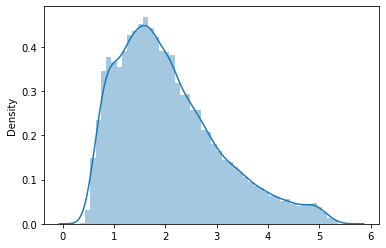

In [19]:
sns.distplot(result)

In [20]:
sub = pd.read_csv('/kaggle/input/playground-series-s3e1/sample_submission.csv')
sub['MedHouseVal'] = result
sub.to_csv('sub.csv', index = 0)